In [44]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

train_data = pd.read_csv('traindata.csv')
test_data = pd.read_csv('testdata.csv')
X_train = train_data.ix[:,['upcount 20','breakfromlow','rise percent','maxvol 10']]
y_train = train_data.ix[:,['breakprofit']]
X_test = test_data.ix[:,['upcount 20','breakfromlow','rise percent','maxvol 10']]
y_true = test_data.ix[:,['breakprofit']]

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

y_predict = pd.DataFrame({'breakprofit':list(y_predict)})
y_predict.index = y_true.index.tolist()

wrong_buy = 0
correct_buy = 0

for i in range(0,len(y_predict)):
    if y_predict.iloc[i]['breakprofit'] == 1:
        if y_true.iloc[i]['breakprofit'] == 0:
            print ('wrong predict for buy: ',test_data.iloc[i]['stocksymbol'],' ',test_data.iloc[i]['date'])
            wrong_buy += 1
        if y_true.iloc[i]['breakprofit'] == 1:
            print ('correct predict for buy: ',test_data.iloc[i]['stocksymbol'],' ',test_data.iloc[i]['date'])
            correct_buy += 1
total_buy = wrong_buy + correct_buy
if correct_buy > 0:
    print ('correct buy: ', correct_buy, 'wrong_buy: ', wrong_buy, 'total buy: ', total_buy)
    record = 'total predict: ', accuracy_score(y_true,y_predict), 'buy predict: ', correct_buy/total_buy
    print (record)

C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Christine\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


correct predict for buy:  600019   2017-08-30
correct predict for buy:  600019   2017-10-16
correct predict for buy:  600019   2018-04-10
correct predict for buy:  600020   2017-03-29
wrong predict for buy:  600020   2017-09-01
wrong predict for buy:  600021   2018-05-17
correct predict for buy:  600022   2017-08-30
wrong predict for buy:  600022   2018-01-21
correct predict for buy:  600023   2017-01-03
wrong predict for buy:  600023   2017-02-09
wrong predict for buy:  600026   2017-10-20
wrong predict for buy:  600026   2018-04-10
wrong predict for buy:  600026   2018-05-21
wrong predict for buy:  600027   2017-06-05
correct predict for buy:  600027   2018-05-04
correct predict for buy:  600028   2018-01-01
correct predict for buy:  600028   2018-03-19
correct predict for buy:  600028   2018-05-03
correct predict for buy:  600029   2017-05-12
correct predict for buy:  600029   2017-08-10
correct predict for buy:  600029   2018-01-31
correct predict for buy:  600030   2018-01-15
corr

wrong predict for buy:  600162   2016-07-14
correct predict for buy:  600162   2016-08-15
correct predict for buy:  600162   2016-09-27
correct predict for buy:  600163   2017-03-27
correct predict for buy:  600163   2017-06-16
correct predict for buy:  600163   2017-12-07
correct predict for buy:  600165   2017-08-16
correct predict for buy:  600165   2017-11-16
correct predict for buy:  600166   2017-04-10
correct predict for buy:  600166   2017-08-01
correct predict for buy:  600167   2017-09-08
correct predict for buy:  600167   2017-11-09
correct predict for buy:  600167   2018-01-21
correct predict for buy:  600169   2016-10-18
correct predict for buy:  600169   2017-08-28
correct predict for buy:  600170   2017-06-09
correct predict for buy:  600170   2017-11-08
wrong predict for buy:  600170   2018-03-08
correct predict for buy:  600171   2017-08-17
correct predict for buy:  600171   2018-03-30
correct predict for buy:  600172   2017-08-08
correct predict for buy:  600172   201

correct predict for buy:  600313   2018-04-04
correct predict for buy:  600315   2017-03-20
wrong predict for buy:  600315   2017-04-26
correct predict for buy:  600315   2017-06-19
correct predict for buy:  600316   2017-06-16
wrong predict for buy:  600316   2017-12-14
correct predict for buy:  600316   2018-03-12
correct predict for buy:  600317   2017-06-07
wrong predict for buy:  600317   2017-10-20
wrong predict for buy:  600317   2017-12-07
correct predict for buy:  600319   2017-06-14
correct predict for buy:  600319   2017-08-24
correct predict for buy:  600319   2017-10-13
correct predict for buy:  600320   2018-01-23
wrong predict for buy:  600320   2018-04-11
correct predict for buy:  600321   2017-11-14
correct predict for buy:  600321   2018-01-11
correct predict for buy:  600321   2018-03-05
correct predict for buy:  600322   2016-11-21
correct predict for buy:  600322   2017-01-04
wrong predict for buy:  600322   2018-01-23
correct predict for buy:  600323   2017-06-02


[ 0.13781172  0.03717001  0.82501827] ['upcount 20' 'breakfromlow' 'rise percent']


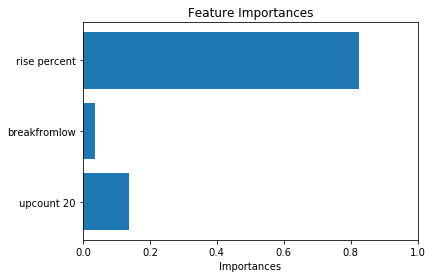

In [45]:
import matplotlib.pyplot as plt

y_importances = clf.feature_importances_
x_importances = X_train.columns.values
print (y_importances,x_importances)
y_pos = np.arange(len(x_importances))

plt.barh(y_pos, y_importances, align='center')
plt.yticks(y_pos, x_importances)
plt.xlabel('Importances')
plt.xlim(0,1)
plt.title('Feature Importances')
plt.show()